In [1]:
import pandas_datareader as pdr

In [2]:
df = pdr.get_data_tiingo('AAPL',api_key ='31f96dd289358f31cd7cc1c973e90bd375e9ae3e' )

C:\Users\Aevis\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [3]:
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('AAPL.csv')

In [6]:
df2 = df.reset_index()['close']

In [7]:
df2[1228:]

1228    152.55
1229    148.48
1230    148.91
1231    149.40
1232    146.71
1233    147.92
1234    147.41
1235    145.31
1236    145.91
1237    151.03
1238    153.83
1239    151.60
1240    152.87
1241    150.59
1242    148.50
1243    150.47
1244    152.59
1245    152.99
1246    155.85
1247    155.00
1248    157.40
1249    159.28
1250    157.83
1251    158.93
1252    160.25
1253    158.28
1254    157.65
1255    160.77
1256    162.36
1257    164.90
Name: close, dtype: float64

In [8]:
df1 = df.reset_index()['close']

In [9]:
df1.shape

(1258,)

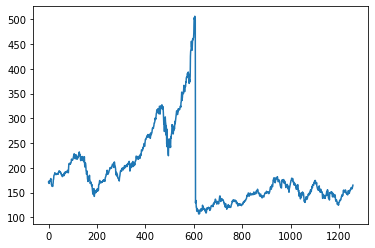

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
import numpy as np

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
df1.shape

(1258, 1)

In [14]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
import numpy 
def create_dataset(dataset,time_step=1) :
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [16]:
time_step = 100
X_train, y_train = create_dataset(train_data,time_step)
X_test, y_test = create_dataset(test_data,time_step)

In [17]:
print(X_train)

[[0.16222918 0.16520977 0.15413901 ... 0.27100814 0.27103319 0.27213525]
 [0.16520977 0.15413901 0.15832185 ... 0.27103319 0.27213525 0.2738134 ]
 [0.15413901 0.15832185 0.16633688 ... 0.27213525 0.2738134  0.27827176]
 ...
 [0.0705072  0.06787727 0.07651847 ... 0.06797746 0.06727614 0.06654978]
 [0.06787727 0.07651847 0.07494051 ... 0.06727614 0.06654978 0.06579837]
 [0.07651847 0.07494051 0.07531622 ... 0.06654978 0.06579837 0.06998121]]


In [18]:
print(X_test.shape), print(y_test.shape)
print(X_train.shape), print(y_train.shape)

(340, 100)
(340,)
(716, 100)
(716,)


(None, None)

In [19]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(716, 100, 1)
(716,)
(340, 100, 1)
(340,)


(None, None)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [22]:
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 242ms/step - loss: 0.0467 - val_loss: 0.0020
Epoch 2/100
12/12 [==============================] - 2s 158ms/step - loss: 0.0158 - val_loss: 0.0049
Epoch 3/100
12/12 [==============================] - 2s 175ms/step - loss: 0.0131 - val_loss: 0.0010
Epoch 4/100
12/12 [==============================] - 2s 170ms/step - loss: 0.0108 - val_loss: 7.9091e-04
Epoch 5/100
12/12 [==============================] - 2s 175ms/step - loss: 0.0088 - val_loss: 0.0023
Epoch 6/100
12/12 [==============================] - 2s 173ms/step - loss: 0.0083 - val_loss: 4.0461e-04
Epoch 7/100
12/12 [==============================] - 2s 177ms/step - loss: 0.0078 - val_loss: 3.4074e-04
Epoch 8/100
12/12 [==============================] - 2s 176ms/step - loss: 0.0067 - val_loss: 7.6745e-04
Epoch 9/100
12/12 [==============================] - 2s 178ms/step - loss: 0.0060 - val_loss: 4.2190e-04
Epoch 10/100
12/12 [==============================] - 2s 177ms/step - l

In [26]:
import tensorflow as tf

In [27]:
tf.__version__

'2.11.0'

In [28]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


11/11 [==============================] - 0s 32ms/step


In [29]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [30]:
import math
from sklearn.metrics import mean_squared_error


In [31]:
math.sqrt(mean_squared_error(y_train,train_predict))

226.24091420827148

In [32]:
math.sqrt(mean_squared_error(y_test,test_predict))

156.69094431705483

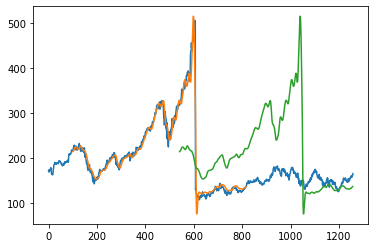

In [33]:
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(test_predict)+(look_back*2)+1:len(df1)-1, :] = train_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [34]:
len(test_data)

441

In [35]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [36]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()


In [37]:
temp_input

[0.08035065748278014,
 0.08180338134001247,
 0.07020663744520972,
 0.10026299311208514,
 0.10735128365685653,
 0.103794614902943,
 0.10820288040075132,
 0.10507201001878513,
 0.10990607388854096,
 0.11133375078271751,
 0.10311834690043825,
 0.10855353788353161,
 0.11078271759549146,
 0.10336881653099561,
 0.09362554790231681,
 0.08598622417031926,
 0.10316844082654975,
 0.10386975579211016,
 0.1026174076393237,
 0.0996618659987476,
 0.09034439574201625,
 0.08541014402003755,
 0.08969317470256727,
 0.08846587351283652,
 0.0943018159048215,
 0.096756418284283,
 0.09109580463368816,
 0.07428929242329363,
 0.06930494677520344,
 0.06394489668127734,
 0.06376956793988725,
 0.07165936130244199,
 0.0635942391984971,
 0.06266750156543521,
 0.05808390732623664,
 0.04809016906700059,
 0.05703193487789604,
 0.05783343769567939,
 0.04566061365059482,
 0.04889167188478394,
 0.045535378835316165,
 0.05705698184095176,
 0.05838447088290544,
 0.05983719474013771,
 0.06675015654351907,
 0.06654978083907

In [38]:
from numpy import array
lst_output = []
n_steps = 100
n_steps2 = 100
i = 0 
print("hello world")
while (i<30): #increase days to increase time stamp
    
    if (len(temp_input)>100):  #increase to increase data that reflects to the model 
        print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1,n_steps2,1))
        print(x_input)
        yhat = model.predict(x_input, verbose = 0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        print(temp_input)
        lst_output.extend(yhat.tolist())
        i = i+1
    
    else :
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input,verbose = 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1

        
print(lst_output)        

hello world
[0.13396055]
101
[0.08035065748278014, 0.08180338134001247, 0.07020663744520972, 0.10026299311208514, 0.10735128365685653, 0.103794614902943, 0.10820288040075132, 0.10507201001878513, 0.10990607388854096, 0.11133375078271751, 0.10311834690043825, 0.10855353788353161, 0.11078271759549146, 0.10336881653099561, 0.09362554790231681, 0.08598622417031926, 0.10316844082654975, 0.10386975579211016, 0.1026174076393237, 0.0996618659987476, 0.09034439574201625, 0.08541014402003755, 0.08969317470256727, 0.08846587351283652, 0.0943018159048215, 0.096756418284283, 0.09109580463368816, 0.07428929242329363, 0.06930494677520344, 0.06394489668127734, 0.06376956793988725, 0.07165936130244199, 0.0635942391984971, 0.06266750156543521, 0.05808390732623664, 0.04809016906700059, 0.05703193487789604, 0.05783343769567939, 0.04566061365059482, 0.04889167188478394, 0.045535378835316165, 0.05705698184095176, 0.05838447088290544, 0.05983719474013771, 0.06675015654351907, 0.0665497808390732, 0.0699311208

In [39]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [40]:
import matplotlib.pyplot as plt

In [41]:
len(df1)

1258

In [42]:
df3 = df1.tolist()
df3.extend(lst_output)

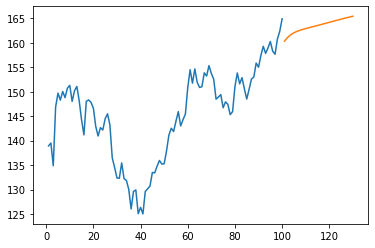

In [43]:
plt.plot(day_new, scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

#final prediction

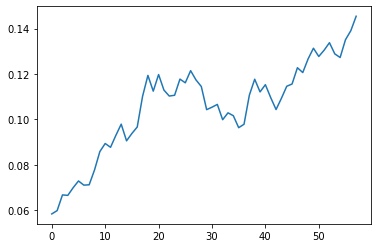

In [44]:
df4 = df1.tolist()
df3.extend(lst_output)
plt.plot(df4[1200:])

#data check 

In [45]:
# bhaiii yeh model is barely even working isse long term predictions nai milne wale kitna hi parameters change krle